In [1]:

library(keras)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2.9000     ✔ purrr   0.3.4     
✔ tibble  3.0.3          ✔ dplyr   1.0.1     
✔ tidyr   1.1.1          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
data <- read_csv("../input//landmark-recognition-2020//train.csv")

Parsed with column specification:
cols(
  id = col_character(),
  landmark_id = col_double()
)



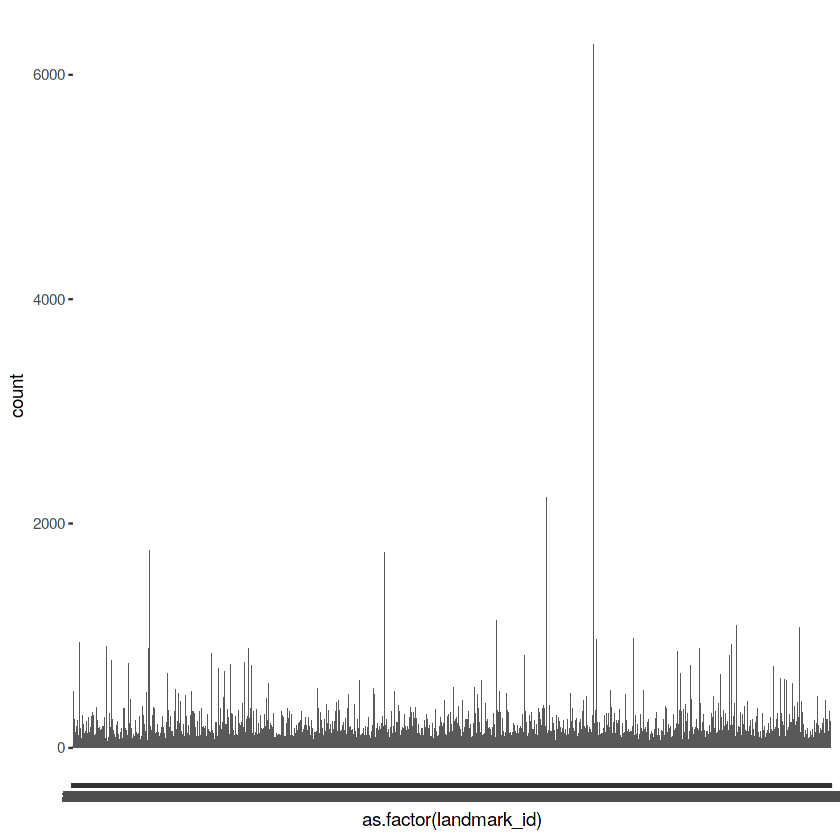

In [3]:
ggplot(data, aes(as.factor(landmark_id)))+
geom_bar()

Preprocessing


In [4]:
head(data)
dim(data)

id,landmark_id
<chr>,<dbl>
17660ef415d37059,1
92b6290d571448f6,1
cd41bf948edc0340,1
fb09f1e98c6d2f70,1
25c9dfc7ea69838d,7
28b13f94a6f1f3c1,7


[1] 1580470       2

Train data frame

In [5]:
# Create train dataFrame
folder="train"
    folder_list <- c(list.dirs(paste("../input//landmark-recognition-2020/",folder,"/",sep = "")))             
    folder_list <- folder_list[str_length(string = folder_list)==48]     
    # sum of total files
    total_files <- 0
    for(i in 1:length(folder_list)){
    sum <-length(list.files(folder_list[i]))  
    total_files <- total_files + sum 
    }
    cat("total ",folder, "files are :",total_files)  
    train_files <-tibble()
    for(i in 1:length(folder_list)){
        files <-list.files(folder_list[i])
        file_path <- paste0(folder_list[i],"/",files,sep="")
        kouvas <- tibble(files = files, file_path = file_path)
        train_files <- rbind(train_files,kouvas)
    }
    train_files$files <- str_remove(train_files$files,pattern = ".jpg")   
       

total  train files are : 1580470

In [6]:
write_csv(train_files, "train_files.csv")

In [7]:
dim(train_files)
head(train_files)
tail(train_files)

[1] 1580470       2

files,file_path
<chr>,<chr>
0000059611c7d079,../input//landmark-recognition-2020/train//0/0/0/0000059611c7d079.jpg
000014b1f770f640,../input//landmark-recognition-2020/train//0/0/0/000014b1f770f640.jpg
000015f76534add3,../input//landmark-recognition-2020/train//0/0/0/000015f76534add3.jpg
00001ae42cd00356,../input//landmark-recognition-2020/train//0/0/0/00001ae42cd00356.jpg
00001b2ba2c69ac5,../input//landmark-recognition-2020/train//0/0/0/00001b2ba2c69ac5.jpg
000020dfc079c013,../input//landmark-recognition-2020/train//0/0/0/000020dfc079c013.jpg


files,file_path
<chr>,<chr>
ffff72cbc6776a86,../input//landmark-recognition-2020/train//f/f/f/ffff72cbc6776a86.jpg
ffffa7978e8cf3c0,../input//landmark-recognition-2020/train//f/f/f/ffffa7978e8cf3c0.jpg
ffffa7a97e805849,../input//landmark-recognition-2020/train//f/f/f/ffffa7a97e805849.jpg
ffffbcd15dc0dc7d,../input//landmark-recognition-2020/train//f/f/f/ffffbcd15dc0dc7d.jpg
ffffd21941691bea,../input//landmark-recognition-2020/train//f/f/f/ffffd21941691bea.jpg
fffffaad1727f1c1,../input//landmark-recognition-2020/train//f/f/f/fffffaad1727f1c1.jpg


In [8]:
# Create test dataFrame
folder="test"
    folder_list <- c(list.dirs(paste("../input//landmark-recognition-2020/",folder,"/",sep = "")))             
    folder_list <- folder_list[str_length(string = folder_list)==47]  
    # sum of total files
    total_files <- 0
    for(i in 1:length(folder_list)){
    sum <-length(list.files(folder_list[i]))  
    total_files <- total_files + sum 
    }       
    cat("total ",folder, "files are :",total_files)
      
test_files <- tibble()
    for(i in 1:length(folder_list)){
        files <-list.files(folder_list[i])
        file_path <- paste0(folder_list[i],"/",files,sep="")
        kouvas <- tibble(files = files, file_path = file_path)
        test_files <- rbind(test_files,kouvas)
    }
    test_files$files <- str_remove(test_files$files,pattern = ".jpg")
  

total  test files are : 10345

In [9]:
write_csv(test_files, "test_files.csv")

In [10]:
dim(test_files)
head(test_files)
tail(test_files)

[1] 10345     2

files,file_path
<chr>,<chr>
00084cdf8f600d00,../input//landmark-recognition-2020/test//0/0/0/00084cdf8f600d00.jpg
000b15b043eb8cf0,../input//landmark-recognition-2020/test//0/0/0/000b15b043eb8cf0.jpg
0011a52f9b948fd2,../input//landmark-recognition-2020/test//0/0/1/0011a52f9b948fd2.jpg
00141b8a5a729084,../input//landmark-recognition-2020/test//0/0/1/00141b8a5a729084.jpg
0018aa4b92532b77,../input//landmark-recognition-2020/test//0/0/1/0018aa4b92532b77.jpg
001baaaab791d8db,../input//landmark-recognition-2020/test//0/0/1/001baaaab791d8db.jpg


files,file_path
<chr>,<chr>
ffc204cb59a7cc36,../input//landmark-recognition-2020/test//f/f/c/ffc204cb59a7cc36.jpg
ffc41ddbcf63289b,../input//landmark-recognition-2020/test//f/f/c/ffc41ddbcf63289b.jpg
ffd4c19b7732cbe9,../input//landmark-recognition-2020/test//f/f/d/ffd4c19b7732cbe9.jpg
ffee2cac79a173d6,../input//landmark-recognition-2020/test//f/f/e/ffee2cac79a173d6.jpg
ffef459d5dc6b981,../input//landmark-recognition-2020/test//f/f/e/ffef459d5dc6b981.jpg
fff30527c712f754,../input//landmark-recognition-2020/test//f/f/f/fff30527c712f754.jpg


In [11]:
train_files <-train_files %>% rename(id = "files")

In [12]:
trainLabeled <- left_join(x = train_files,y = data,by = "id")
head(trainLabeled)
dim(trainLabeled)

id,file_path,landmark_id
<chr>,<chr>,<dbl>
0000059611c7d079,../input//landmark-recognition-2020/train//0/0/0/0000059611c7d079.jpg,107382
000014b1f770f640,../input//landmark-recognition-2020/train//0/0/0/000014b1f770f640.jpg,15430
000015f76534add3,../input//landmark-recognition-2020/train//0/0/0/000015f76534add3.jpg,158262
00001ae42cd00356,../input//landmark-recognition-2020/train//0/0/0/00001ae42cd00356.jpg,172552
00001b2ba2c69ac5,../input//landmark-recognition-2020/train//0/0/0/00001b2ba2c69ac5.jpg,91402
000020dfc079c013,../input//landmark-recognition-2020/train//0/0/0/000020dfc079c013.jpg,117339


[1] 1580470       3

In [13]:
write_csv(trainLabeled, "trainLabeled.csv")

In [14]:
lower_limit_freq = 1000

In [15]:
trainLabeledSorted <- trainLabeled %>% 
group_by(landmark_id) %>% 
mutate(count_class = n()) %>% 
arrange(desc(count_class)) %>% 
filter(count_class>=lower_limit_freq)%>%ungroup()

In [16]:
head(trainLabeledSorted)
dim(trainLabeledSorted)

id,file_path,landmark_id,count_class
<chr>,<chr>,<dbl>,<int>
0006f34cf361f69c,../input//landmark-recognition-2020/train//0/0/0/0006f34cf361f69c.jpg,138982,6272
0010089264bb0573,../input//landmark-recognition-2020/train//0/0/1/0010089264bb0573.jpg,138982,6272
001734558e2fde76,../input//landmark-recognition-2020/train//0/0/1/001734558e2fde76.jpg,138982,6272
002f0924a58dfc46,../input//landmark-recognition-2020/train//0/0/2/002f0924a58dfc46.jpg,138982,6272
002ffa2d61d4190f,../input//landmark-recognition-2020/train//0/0/2/002ffa2d61d4190f.jpg,138982,6272
0037c9c09a4cd42c,../input//landmark-recognition-2020/train//0/0/3/0037c9c09a4cd42c.jpg,138982,6272


[1] 15298     4

In [17]:
dim(trainLabeledSorted)[1]
dim(trainLabeledSorted)[1] %/% 1.3


[1] 15298

[1] 11767

In [18]:
write_csv(trainLabeledSorted,"trainLabeledSorted.csv")

In [19]:
#trainLabeledSorted <- trainLabeled

In [20]:
batch_size <- 64
sample_size = dim(trainLabeledSorted)[1]
#sample_size = 100000
train_size_portion = 0.7

In [21]:
#train size
x=(dim(trainLabeledSorted)[1] %/% (1+(1-train_size_portion)))/batch_size
train_size=(round(x)-1)*batch_size
cat("train size is..",train_size, "and ",train_size/batch_size, "batches")

train size is.. 11712 and  183 batches

In [22]:
#x=(sample_size*train_size_portion) %/% batch_size
#train_size =(round(x)-1)*batch_size
#cat("train size is..",train_size, "and ",train_size/batch_size, "batches")

In [23]:
x=(sample_size-train_size) %/% batch_size
validation_size=(round(x)-1)*batch_size
cat(" validation size is..",validation_size, "and",validation_size/batch_size, "batches","\n")


 validation size is.. 3520 and 55 batches 


In [24]:
cat(" sample:",sample_size, "\n","train and validation:", train_size+validation_size,"\n",
    "difference is:",
    (sample_size-train_size-validation_size))

 sample: 15298 
 train and validation: 15232 
 difference is: 66

In [25]:
indices <- sample(1:nrow(trainLabeledSorted))

training_indices <- indices[1:train_size]
validation_indices <- indices[(train_size+1):(train_size+validation_size)]
#test_indices <- indices[(training_size+validation_size+1):(training_size+validation_size+test_size)]

In [26]:
length(training_indices)
length(validation_indices)

[1] 11712

[1] 3520

In [27]:
train_dataframe <- trainLabeledSorted[training_indices,]
train_dataframe$landmark_id <- as.character(train_dataframe$landmark_id)

In [28]:
write_csv(train_dataframe,"train_dataframe.csv")

In [29]:
output<-length(unique(x = train_dataframe$landmark_id))
output

[1] 7

In [30]:
val_dataframe <- trainLabeledSorted[validation_indices,]
val_dataframe$landmark_id <- as.character(val_dataframe$landmark_id)

In [31]:
write_csv(val_dataframe, "val_dataframe.csv")

In [32]:
nrow(distinct(val_dataframe, landmark_id))

[1] 7